# STAT 301 Final Group Project
##### Group 8 - Aayush Sharma, Shuyang Geng, Sungha Choi, William Cheng
------

In [27]:
# Import necessary libraries
library(dplyr)
library(tidyverse)
library(tidymodels)
library(infer)
library(cowplot)
library(GGally)
library(ggplot2)
library(grid)
library(gridExtra)
library(AER)
library(patchwork)
library(broom)

## Introduction

The modern workplace is getting more diverse by the day, with more individuals of different backgrounds and values working together under the same roof for a common goal (Davies & Joshi, 1998). With this more inclusive and diverese workspace, more emphasis has been given to the wage and education disparity between individuals from different backgrounds. This disparity is reinforced when looking into the income returns of black males when compared to white males working in the United States, where black men were shown to consistently earn less than their white counterparts and had also received less education than them (Wright, 1978). 

With the previous literature showing strong evidence of an income disparity based on an individuals' background, this project aims to look into the aforementioned income disparity by using the 1994 US Census Data, which includes a person's income, age, race, education level, and sex along with other descriptive variables for an individual. Using the census data, **we aim to look for an association between an individuals' income and an individuals' age, race, education level, and sex**. Any significant bias found in the income of an individual and their personal background could be used in the future to explore a broader interest in understanding the complex interplay of numerous demographic factors in shaping individuals' income.

### Importing the Dataset

In [28]:
# Load data with correct columns
census_data <- read_csv("https://github.com/whalebeavercat/STAT-301-Census-Project/blob/main/data/adult.data?raw=TRUE", col_names = FALSE, show_col_types = FALSE)
col_names = c("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income")
colnames(census_data) <- col_names

head(census_data)
nrow(census_data)

age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


[1] 32561

`Table 1`: Initial Dataset

### Dataset Summary

The dataset being explored is the [1994 Census Income Data Set](https://archive.ics.uci.edu/dataset/2/adult) that explores personal annual income of US citizens in 1994. It is a reasonably clean dataset but it has some missing values in the coloumns *workclass*, *occupation*, and *native-country*. These missing values have been entered as "?" and will be removed from the dataset. The variables present in the dataset are:

- `age`: numeric variable, the age of a person in years. Only individuals with `age` > 16 were considered.
- `workclass`: categorical variable, type chr, represents the type of employement, such as Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: numeric variable, represent the final weight, meaning the number of people the census believes are represented by all the features in the row
- `education`: categorical variable, type chr, represents the highest education level obtained, such as Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: numeric variable, the highest education level obtained in numeric form
- `marital-status`: categorical variable, type chr, represents the marital status for both civilian and Armed Forces marriages, such as Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: categorical variable, type chr, represents the type of occupation the person has, such Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: categorical variable, type chr, represents the relations the person has to others, similar to `maritial-status`, such as Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: categorical variable, type chr, represents the race of the individual, such as White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: categorical variable, type chr, represents the biological sex, such as Female, Male.
- `capital-gain`: numeric variable, the capital gain for the individual or profit made by selling assets.
- `capital-loss`: numeric variable, the capital loss for the individual or loss from selling assets.
- `hours-per-week`: numeric variable, the number of hours per week the individual works.
- `native-country`: categorical variable, the country where the individual is born, such as United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- `income`: categorical variable, type logical, whether the individual makes <=50K or > 50K

### Exploratory Data Analysis

#### Cleaning and Wrangling the Dataset
Any row which contains the value "?" would be filtered out and the filtered dataset would then be processed again to remove all the unnecessary coloumns from the filtered dataset. This leaves us with a dataset with 30162 rows and 5 columns.

In [29]:
census_data_clean <- census_data %>%
    filter_all(all_vars(. != "?")) %>%
    select(age, `education-num`, race, sex, income)
head(census_data_clean)
nrow(census_data_clean)

age,education-num,race,sex,income
<dbl>,<dbl>,<chr>,<chr>,<chr>
39,13,White,Male,<=50K
50,13,White,Male,<=50K
38,9,White,Male,<=50K
53,7,Black,Male,<=50K
28,13,Black,Female,<=50K
37,14,White,Female,<=50K


[1] 30162

`Table 2`: Wrangled and Cleaned Dataset

Given that the origninal dataset is a census dataset with large populations and various categories, it is more appropriate to take a sample from it. Taking a random sample can help identify trends, outliers, and potential issues without processing the entire dataset, improving computational efficiency. A simple random sample of size 1000 should be a good start as the sample is small enough to avoid introducing any biases.

In [30]:
set.seed(2024)

sample_data <- census_data_clean %>%
    sample_n(size = 1000)
head(sample_data)

age,education-num,race,sex,income
<dbl>,<dbl>,<chr>,<chr>,<chr>
35,9,White,Male,>50K
23,10,White,Female,<=50K
39,13,White,Female,<=50K
20,10,Black,Female,<=50K
26,9,White,Male,<=50K
36,11,White,Male,>50K


`Table 3`: Sampled Data

### Data Visualization

Using histograms and bar graphs, we compare the distribution of each factor.

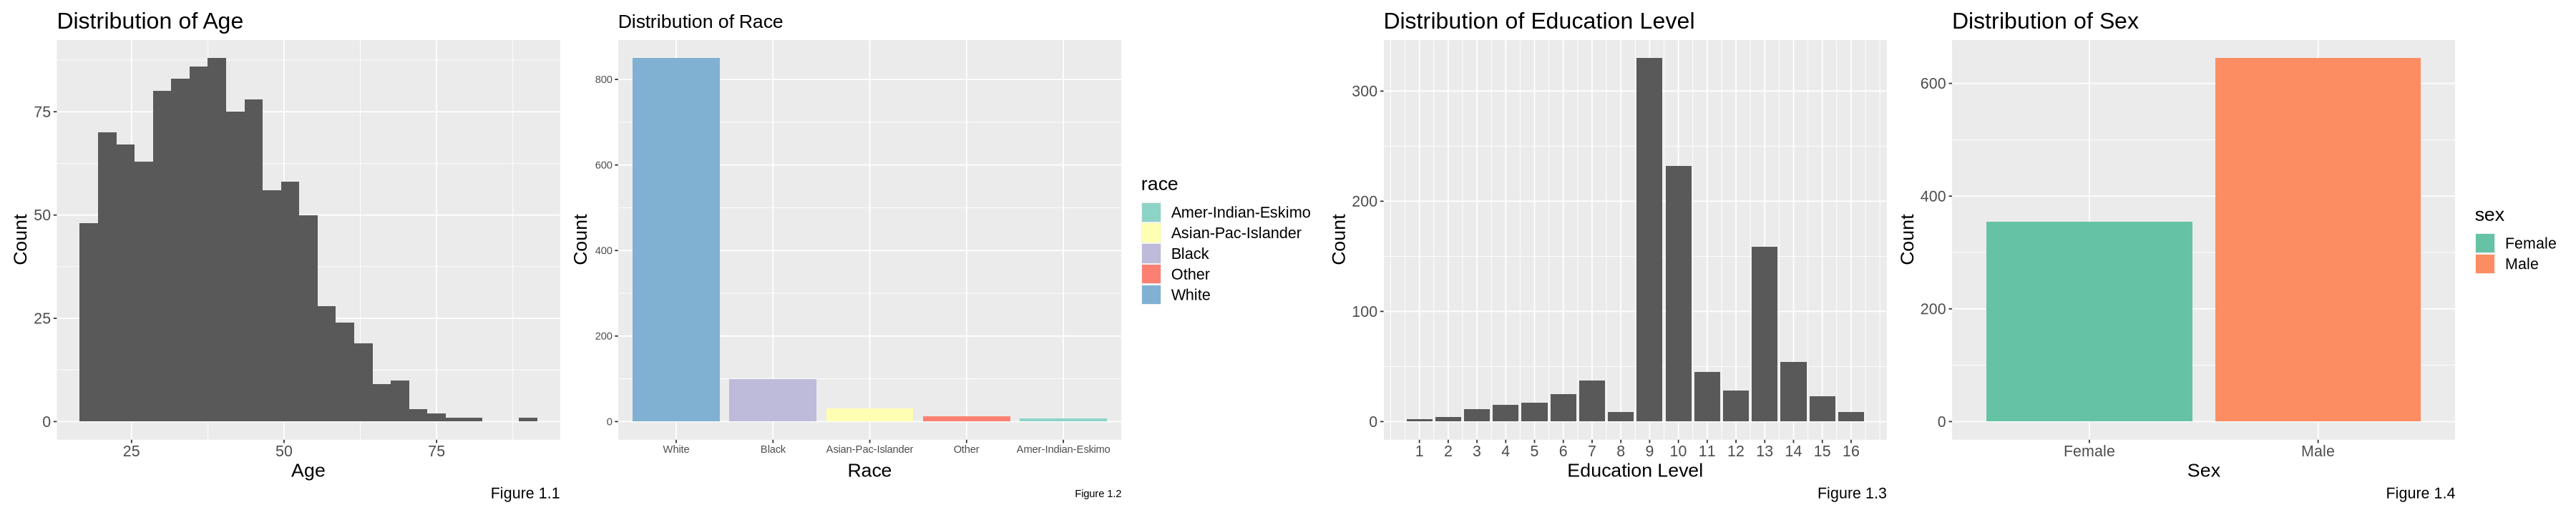

In [31]:
options(repr.plot.width = 30, repr.plot.height = 6)

# Histogram for age
bar_age <- ggplot(sample_data, aes(x = age)) + 
    geom_histogram(binwidth = 3) +
    labs(title = "Distribution of Age", 
         x = "Age",
         y = "Count",
        caption = "Figure 1.1") +
    theme(text = element_text(size = 16))


# Count the number and proportion of individuals in race to help order the bars in descending order
table_race <- count(sample_data, race) |>
mutate(prop = round(n / nrow(sample_data), 3))

# Bar graph for race
bar_race <- ggplot(table_race, aes(x = reorder(race, -n), y = n, fill = race)) + 
    geom_bar(stat = "identity") +
    labs(title = "Distribution of Race", 
         x = "Race", 
         y = "Count",
        caption = "Figure 1.2")+ 
    scale_fill_brewer(palette = "Set3") +
    theme(plot.title = element_text(size = 16),
          axis.title.x = element_text(size = 16),
          axis.title.y = element_text(size = 16),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 13))



# Bar graph for education level
bar_education <- ggplot(sample_data, aes(x = `education-num`)) + 
    geom_bar() +
    labs(title = "Distribution of Education Level", 
         x = "Education Level",
         y = "Count",
         caption = "Figure 1.3") +
    scale_x_continuous(breaks = seq(1, 16, by = 1)) +
    theme(text = element_text(size = 16))
                       

# Bar graph for sex
bar_sex <- ggplot(sample_data, aes(x = sex, fill = sex)) + 
    geom_bar() +
    labs(title = "Distribution of Sex",
         x = "Sex",
         y = "Count",
        caption = "Figure 1.4") + 
    scale_fill_brewer(palette = "Set2") +
    theme(text = element_text(size = 16))


(bar_age | bar_race | bar_education | bar_sex) + plot_layout(ncol = 4)

The plots above provide insights into the overall trends of each factor. Figure 1.1 shows that the mean age is around 38 years. The distribution is slightly right-skewed, indicating that a larger number of individuals are younger than the mean age. The dataset predominantly consists of individuals of White racial background, and individuals with education levels of 9, 10, and 11. Additionally, there are approximately twice as many males as there are females in the dataset.

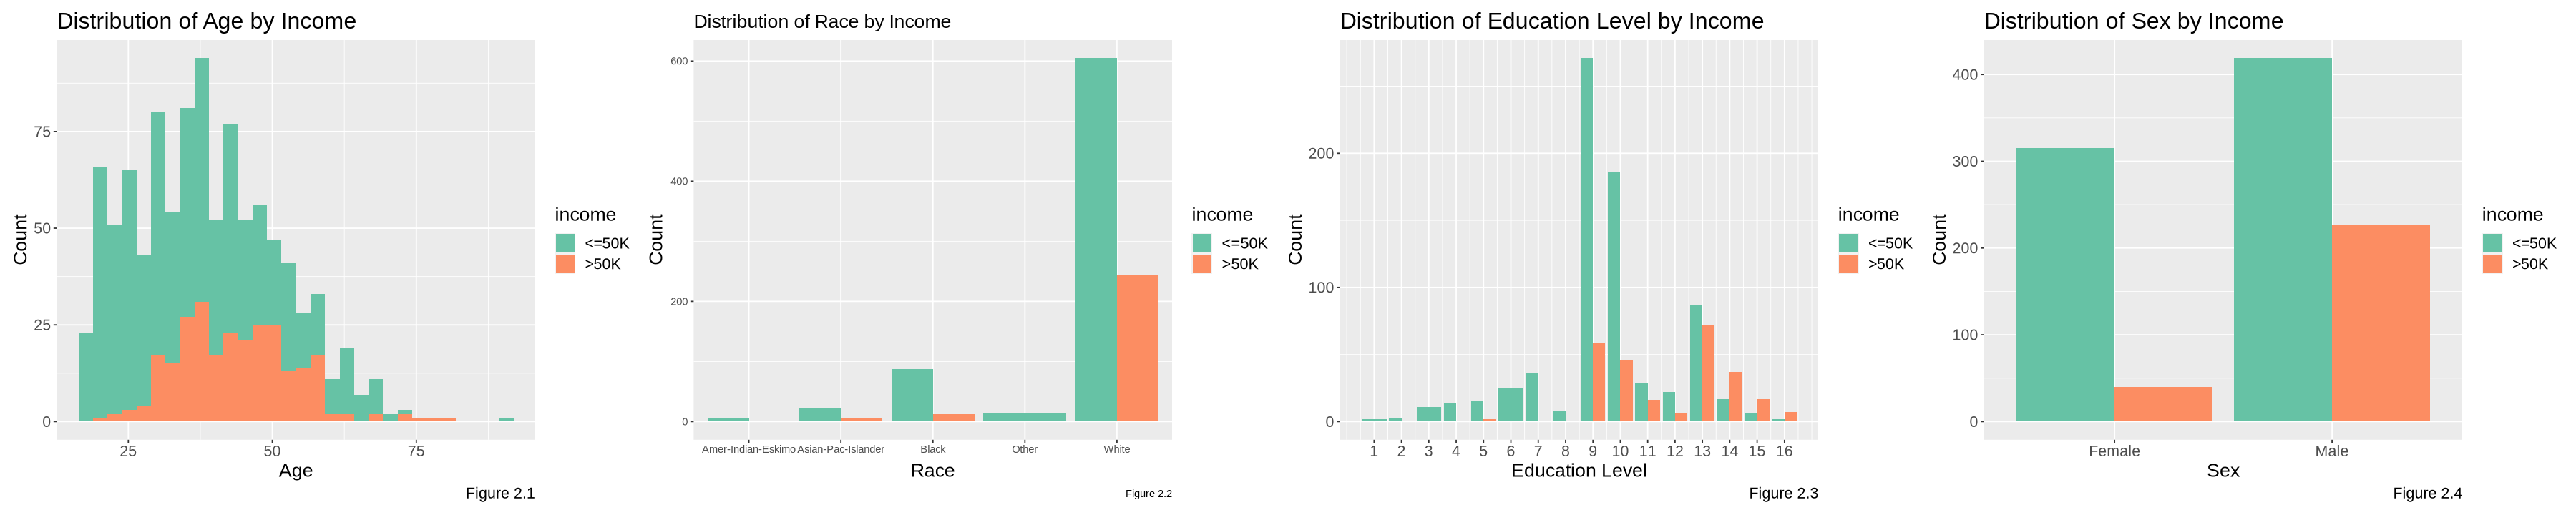

In [32]:
options(repr.plot.width = 30, repr.plot.height = 6)


# Histogram for age by income
plot_age_income <- ggplot(sample_data, aes(x = age, fill = income)) + 
    geom_histogram(bins = 30) +
    labs(title = "Distribution of Age by Income", 
         x = "Age",
         y = "Count",
         caption = "Figure 2.1") + 
    scale_fill_brewer(palette = "Set2") + 
    theme(text = element_text(size = 16))


# Bar plot for race by income
plot_race_income <- ggplot(sample_data, aes(x = race, fill = income)) + 
    geom_bar(position = "dodge") +
    labs(title = "Distribution of Race by Income",
        x = "Race",
        y = "Count",
        caption = "Figure 2.2") + 
    scale_fill_brewer(palette = "Set2") +
    theme(plot.title = element_text(size = 16),
          axis.title.x = element_text(size = 16),
          axis.title.y = element_text(size = 16),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 13))


# Bar plot for education level by income
plot_education_income <- ggplot(sample_data, aes(x = `education-num`, fill = income)) + 
    geom_bar(position = "dodge") +
    labs(title = "Distribution of Education Level by Income", 
         x = "Education Level",
         y = "Count",
         caption = "Figure 2.3") + 
    scale_fill_brewer(palette = "Set2") + 
    scale_x_continuous(breaks = seq(1, 16, by = 1)) +
    theme(text = element_text(size = 16))


# Bar plot for sex by income
plot_sex_income <- ggplot(sample_data, aes(x = sex, fill = income)) + 
    geom_bar(position = "dodge") +
    labs(title = "Distribution of Sex by Income",
        x = "Sex",
        y = "Count",
        caption = "Figure 2.4") + 
    scale_fill_brewer(palette = "Set2") +
    theme(text = element_text(size = 16))


(plot_age_income | plot_race_income | plot_education_income | plot_sex_income) + plot_layout(ncol = 4)

Here, we compare the distribution of each factor by `income` using histograms and grouped bar charts. Figure 2.1 demonstrates that individuals earning over \\$50K generally exhibit a more normally distributed age profile, with a higher mean age of around 43, compared to approximately 36 for those earning less than or equal to \\$50K. Figure 2.2 indicates that a higher proportion of White individuals earn above \\$50K compared to other races. Figure 2.3 reveals that no individuals in education level 1 earn above \\$50K, while those with education levels 14, 15, and 16 are more likely to surpass this income threshold. Lastly, Figure 2.4 shows that a greater proportion of males earn above \\$50K compared to females.

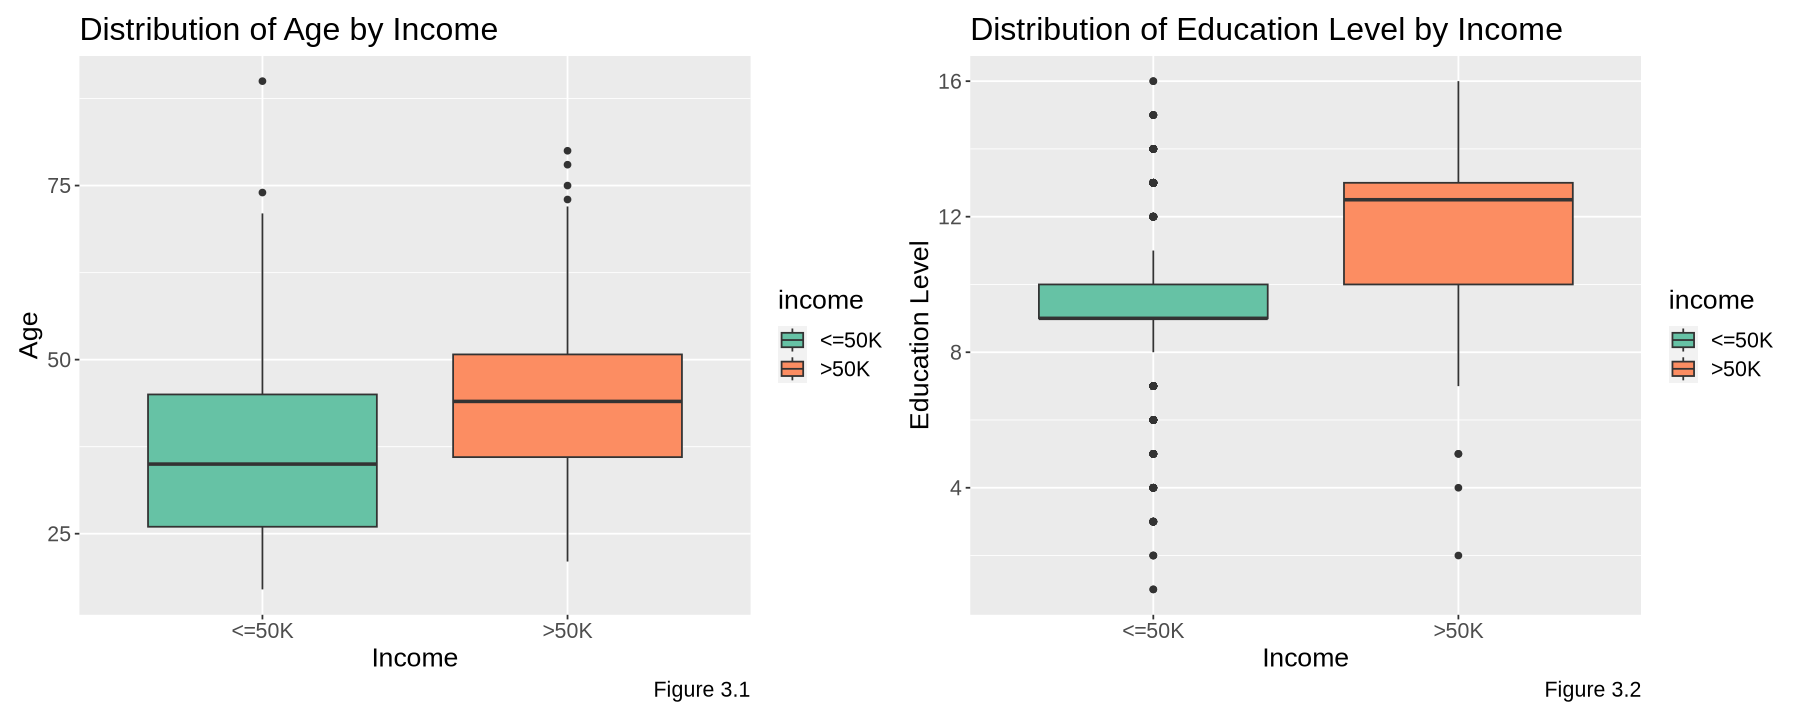

In [33]:
options(repr.plot.width = 15, repr.plot.height = 6)

# side by side box plot to compare the distribution of age by income
box_age_income <- ggplot(sample_data, aes(x = income, y = age, fill = income)) + 
    geom_boxplot() +
    labs(title = "Distribution of Age by Income", 
         x = "Income", 
         y = "Age",
         caption = "Figure 3.1") + 
    scale_fill_brewer(palette = "Set2") +
    theme(text = element_text(size = 16))

# side by side box plot to compare the distribution of education level by income
box_education_income <- ggplot(sample_data, aes(x = income, y = `education-num`, fill = income)) + 
    geom_boxplot() +
    labs(title = "Distribution of Education Level by Income", 
         x = "Income", 
         y = "Education Level",
         caption = "Figure 3.2") + 
    scale_fill_brewer(palette = "Set2") +
    theme(text = element_text(size = 16))


(box_age_income | box_education_income) + plot_layout(ncol = 2)

Figure 3.1 presents that those earning more than \\$50K generally display a higher median age, with their boxplot positioned slightly above that of individuals earning \\$50K or less. However, the considerable overlap between the distributions suggests that the age difference is not substantially significant.

With Figure 3.2, it becomes more apparent that individuals with higher education levels tend to have higher incomes (>50K). This is evident from the fact that, for incomes <=50K, the lower quartile and median education levels are 9, and the upper quartile is 10. Conversely, for incomes >50K, the lower quartile is 10, the median is 12, and the upper quartile is 13.


This series of histograms, bar plots, and boxplots visually illustrates the distribution of individuals across income brackets within various demographic categories (age, race, education level, sex). By analyzing the patterns in these plots, we can gain insights into how income is distributed across different demographic groups and identify potential correlations between demographic factors and income.

## Methods and Results

#### Why Additive Logistic Regression Is Appropriate
Logistic regression is a suitable method for addressing the research question because it allows for examining the relationship between demographic factors (age, race, education level, and sex) and a binary outcome variable (income >50K or <=50K). Given that the response variable (income) is binary and the predictors are a mix of categorical and continuous variables, logistic regression can effectively model the probability of earning more than $50,000 based on the demographic predictors. This method is appropriate because it provides a framework for understanding how these demographic factors influence the likelihood of having income above a certain threshold. Additionally, the additive model allows us to focus on examining the individual effects of each explanatory variable.

#### Assumptions

To apply logistic regression, several assumptions need to be met:

1. **Binary Response:** The response variable must be dichotomous, meaning it has only two possible outcomes or can be aggregated into two categories.
2. **Independence:** The observations must be independent of each other; the outcome of one observation does not influence the outcome of another observation.
3. **Variance Structure:** The variance of a binomial random variable is $np(1-p)$, which is highest when the probability of success is 0.5.
4. **Linearity:** The relationship between the logarithm of the odds ratio, represented as $log(\frac{p}{1-p})$, and $x$ must be linear.


#### Potential Limitations or Weaknesses

Despite its usefulness, logistic regression has some limitations:

1. **Sample Bias:** Logistic regression results may be biased if the sample is not representative of the population of interest. For example, if certain demographic groups are overrepresented or underrepresented in the sample, it may affect the generalizability of the results.
2. **Model Complexity:** The regression assumes a linear relationship between the log odds of the response variable and the predictor variables. If the true relationship is nonlinear, logistic regression may not accurately capture the underlying pattern.
3. **Assumption of Independence:** While logistic regression assumes independence of observations, in practice, data points may be correlated due to clustering or repeated measures. Violation of the independence assumption can lead to incorrect confidence intervals and p-values.

#### The model

The response variable can only take the values 0 or 1. The binary response $Y_i$, the proportion of income of >50K is: 

$$
Y_i =
\begin{cases}
1 \; \; \; \; \mbox{if the $i$th observation is >50K},\\
0 \; \; \; \; 	\mbox{otherwise}
\end{cases}
$$


Logistic regression estimates the probability of success $p_i$ based on a set of covariates, but it does not directly express it as a linear function of those covariates. Instead, we express $p_i$ into an unrestricted scale known as the log-odds:

$$
\mbox{logit}(p_{i,\texttt{income}}) = \log \bigg( \frac{p_{i, \texttt{income}}}{1 - p_{i,\texttt{income}}}\bigg) = \beta_0 + \beta_1 X_{i, \texttt{age}} + \beta_2 X_{i,\texttt{education-num}} + \beta_3 X_{i,\texttt{race Asian-Pac-Islander}} + \beta_4 X_{i,\texttt{race Black}} + \beta_5 X_{i,\texttt{race Other}} + \beta_6 X_{i,\texttt{race White}} + \beta_7 X_{i,\texttt{sex Male}}
$$

or equivalently

$$
p_{i,\texttt{income}} = \frac{e^{\beta_0 + \beta_1 X_{i, \texttt{age}} + \beta_2 X_{i,\texttt{education-num}} + \beta_3 X_{i,\texttt{race Asian-Pac-Islander}} + \beta_4 X_{i,\texttt{race Black}} + \beta_5 X_{i,\texttt{race Other}} + \beta_6 X_{i,\texttt{race White}} + \beta_7 X_{i,\texttt{sex Male}}}}{1 + e^{\beta_0 + \beta_1 X_{i, \texttt{age}} + \beta_2 X_{i,\texttt{education-num}} + \beta_3 X_{i,\texttt{race Asian-Pac-Islander}} + \beta_4 X_{i,\texttt{race Black}} + \beta_5 X_{i,\texttt{race Other}} + \beta_6 X_{i,\texttt{race White}} + \beta_7 X_{i,\texttt{sex Male}}}}.
$$


<br>
Each coefficient represents the effect of the corresponding explanatory variable on the log-odds of the outcome variable compared to a reference category, while holding all other variable constant.

- $\beta_0$: The intercept term represents the baseline log-odds of having income >50K versus <=50K when all other predictor variables are zero.
- $\beta_1$: The change in log-odds associated with a one-unit increase in age.
- $\beta_2$: The change in log-odds associated with a one-unit increase in education level.
- $\beta_3$: The difference in log-odds between individuals of Asian-Pacific-Islander race and the reference group (i.e., Asian-Pacific-Islander vs. American-Indian-Eskimo)
- $\beta_4$: The difference in log-odds between individuals of Black race and the reference group.
- $\beta_5$: The difference in log-odds between individuals of Other race and the reference group.
- $\beta_6$: The difference in log-odds between individuals of White race and the reference group.
- $\beta_7$: The difference in log-odds between males and females.

##### **Hypothesis Testing**

Hypothesis testing has been conducted to determine whether there is a significant association between demographic factors and income levels with a significance level, $\alpha$, of 5%. 


Our hypothesis test is as follows:

\begin{gather*}
H_0: \beta_1 = \beta_2 = \beta_3 = \beta_4 = \beta_5 = \beta_6 = 0\\
H_a: \text{At least one of $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, $\beta_5$, and $\beta_6$ is not equal to 0.}
\end{gather*}


This has been accomplished using the Wald statistic $z_j$ where $j$ is 1, 2, 3, 4, 5, or 6.

$$z_j = \frac{\hat{\beta}_j}{\mbox{SE}\left(\hat{\beta}_j\right)}$$

where $\mbox{SE}\left(\hat{\beta}_j\right)$ is the standard error of the estimated coefficient.

This has an approximately standard normal distribution under $H_0$ when the sample size $n$ is large enough.

##### **Variance Inflation Factor**
To assess multicollinearity, Variance Inflation Factor (VIF) using the `vif()` function has been applied to the logistic regression model `log_model`. The VIF measures the correlation between predictors in a regression model, indicating multicollinearity if the VIF is significantly greater than 1.

### Implementation of a Proposed Model <a name="implementation"></a>
The computational code implementing the proposed method along with the results table is provided below:

Start by replacing the levels >50K and <=50K with the numerical values 1 and 0. This is necessary because the response variable can only take the values 0 or 1 for logistic regression.

In [34]:
sample_data <- sample_data |> 
    mutate(income = ifelse(income == "<=50K", 0, 1))

head(sample_data)

age,education-num,race,sex,income
<dbl>,<dbl>,<chr>,<chr>,<dbl>
35,9,White,Male,1
23,10,White,Female,0
39,13,White,Female,0
20,10,Black,Female,0
26,9,White,Male,0
36,11,White,Male,1


`Table 4`: Dataset with Binary Predictive Label

Count the frequency of each unique value in the income variable and check if they are converted successfully.

In [35]:
income_counts <- table(sample_data$income)

income_counts


  0   1 
734 266 

Generate the additive logistic regression model.

In [36]:
log_model <- glm(income ~ age + `education-num` + race + sex,
             data = sample_data, family = "binomial")

Obtain a summary table of results using the function `tidy()`, mutate the exponentiated coefficients, and round to 3 decimal places.

In [37]:
log_model_results  <-
    tidy(log_model) %>% 
    mutate(exp.estimate = exp(estimate)) %>% 
    mutate_if(is.numeric, round, 3)

log_model_results

term,estimate,std.error,statistic,p.value,exp.estimate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.470,1.019,-7.329,0.000,0.001
age,0.043,0.007,6.146,0.000,1.044
`education-num`,0.384,0.038,10.009,0.000,1.468
raceAsian-Pac-Islander,-1.068,1.019,-1.048,0.295,0.344
raceBlack,-0.881,0.942,-0.936,0.349,0.414
raceOther,-15.578,594.056,-0.026,0.979,0.000
raceWhite,-0.328,0.883,-0.371,0.710,0.720
sexMale,1.483,0.205,7.233,0.000,4.405


`Table 5`: Additive Logistic Regression Model Results

Calculate the Variance Inflation Factor to determine multicollinearity if vif >> 1. After rounding the VIF scores to three decimal places, extract the VIF scores for each predictor from the resulting dataframe.

In [38]:
vif_score <- round(vif(log_model),3)

vif_score[, 3]

age `education-num`            race             sex 
          1.002           1.011           1.003           1.010

## Discussion

#### Summary of Findings/Implications and Impact

The logistic regression analysis indicates that education level, sex, and age are strongly associated with income levels, as indicated by their significant coefficients (p-value < 0.001 < $\sigma$). Specifically, for every one-unit increase in education level, the odds of having an income >50K increase by approximately 1.468 times, and being male increases the odds by about 4.405 times compared to being female. Every one-year increase in age, the odds of having an income >50K increases by about 1.044 times. `race` is not a significant factor when considering `income`, since all categories have a p-value $> 0.05$. Given the statistical significance of education level, sex, and age coefficients, we reject the null hypothesis that all coefficients are zero. These findings suggest that age, education level, and sex are important determinants of income in the examined population. This information could be useful for policymakers focusing on educational and employment equity, and for further research to explore the nuanced effects of these variables on income disparities.

#### Expectations & Results
The logistic regression analysis demonstrates that education level, sex, and age significantly affect income levels, whereas race does not show a significant effect. Given the limited data on racial groups other than white, this outcome was somewhat expected. The insufficient representation of non-white groups likely reduced the statistical power necessary to detect significant differences based on race, thereby affecting the outcomes. On the other hand, the significant findings for education, sex, and age align with prevailing socio-economic theories that correlate these factors with higher earning potential.

#### Limitations & Future Improvements
One significant setback arises from the sample itself concerning the uneven distribution of the input variable `race`. The level "white" is overwhelmingly dominant, which can affect the inferences as the coefficients in other races may have the problem of overfitting or underfitting and high leverage as well.

Another limitation is that feature selection was not conducted in our research. It may enhance our model accuracy and interpretability by identifying the variables that strongly impact the income. Feature selection can also reduce the training time of our future predictive models, especially beneficial when dealing with the large census dataset.

Nevertheless, despite these limitations, the binary logistic regression remains fitting for this sample due to its ability to handle binary outcomes and multiple predictors in comparison with the simple linear regression. By effectively modeling the relationship between the input variables and annual incomes, it promotes the identification of the most influential factors contributing to the yearly income, enabling better understanding in the factors affecting incomes. The predominant representation of the "white" race within our sample poses a substantial challenge, as it may lead to biased coefficients and issues of overfitting or underfitting for other racial groups. To address this, future research might explore alternative sampling methods such as stratified sampling and cluster sampling to ensure a more balanced representation across different racial groups. This approach would likely yield more robust and generalizable results.


#### Potential Future Questions
Given the non-significant results regarding race in this study, future research could delve deeper into this aspect by utilizing a more diverse and extensive dataset. For instance, does the impact of race on income vary significantly across different regions or industries? Furthermore, incorporating additional variables such as occupation, industry, work experience, and hours worked per week could offer a more detailed understanding of the factors that influence income, for example, how these factors interact with age, education level, and sex to influence income?

### References
Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.

Davies, H., & Joshi, H. (1998). Gender and income inequality in the UK 1968-1990: The feminization of earnings or of poverty? Journal of the Royal Statistical Society. Series A, Statistics in Society, 161(1), 33-61. https://doi.org/10.1111/1467-985X.00089

Wright, E. O. (1978). Race, class, and income inequality. The American Journal of Sociology, 83(6), 1368-1397. https://doi.org/10.1086/226705